In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from collections import Counter

In [11]:
for file in ['long-beach-va.data', 'switzerland.data', 
             'cleveland.data', 'hungarian.data']:
    line = ''
    lines = []
    with open(file, 'r') as f:
        for l in f.readlines():
            l = l.replace('\n', '').replace(' ', '\t')
            line += l
            if 'name' == l[-4:]:
                lines.append(line)
                line = ''
    with open(f'processed.{file}', 'w') as f:
        for line in lines:
            print(line, file=f)

In [87]:
columns = ["id", "ccf", "age", "sex", "painexer", "relrest", "pncaden", "cp", "trestbps", "htn", "chol", 
           "smoke", "cigs", "years", "fbs", "dm", "famhist", "restecg", "ekgmo", "ekgday", "ekgyr", "dig", 
           "prop", "nitr", "pro", "diuretic", "proto", "thaldur", "thaltime", "met", "thalach", "thalrest", 
           "tpeakbps", "tpeakbpd", "dummy", "trestbpd", "exang", "xhypo", "oldpeak", "slope", "rldv5", "rldv5e", 
           "ca", "restckm", "exerckm", "restef", "restwm", "exeref", "exerwm", "thal", "thalsev", "thalpul", "cmo", 
           "cday", "cyr", "num", "lmt", "ladprox", "laddist", "diag", "cxmain", "ramus", "om1", "om2", "rcaprox", 
           "rcadist", "name"]

data = np.zeros((1, len(columns)))

for file in ['processed.long-beach-va.data', 'processed.switzerland.data', 
             'processed.cleveland.data', 'processed.hungarian.data']:
    data = np.vstack((data, np.genfromtxt(file, delimiter='\t')))
data = data[1:]
df = pd.DataFrame(data=data, columns=columns, index=None)
df.to_csv('df.csv', sep='\t', index=False)

In [88]:
smoke_data = df[df.smoke != -9]

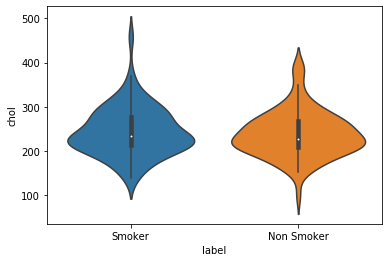

In [89]:
smoker = smoke_data[smoke_data['smoke'] == 1.0].copy()
non_smoker = smoke_data[smoke_data['smoke'] == 0.0].copy()

smoker_chol = smoker[(smoker.chol != 0.0) & (smoker.chol != -9.0)].chol.values
non_smoker_chol = non_smoker[(non_smoker.chol != 0.0) & (non_smoker.chol != -9.0)].chol.values

label = ['Smoker'] * len(smoker_chol)
label.extend(['Non Smoker'] * len(non_smoker_chol))
chol = np.append(smoker_chol, non_smoker_chol)

plt_data = pd.DataFrame()
plt_data['label'] = label
plt_data['chol'] = chol

sns.violinplot(x='label', y='chol', data=plt_data)

In [94]:
len(smoker[smoker.sex == 1.0]), len(smoker[smoker.sex == 0.0])

(115, 4)

In [101]:
columns = ['age','sex','cp','trestbps','chol','fbs','restecg',
           'thalach','exang','oldpeak','slope','ca','thal','num']

data = np.zeros((1, len(columns)))

for file in ['processed.va.csv', 'processed.switzerland.csv',
             'processed.cleveland.csv', 'processed.hungarian.csv']:
    data = np.vstack((data, np.genfromtxt(file, delimiter=',')))
data = data[1:]
df2 = pd.DataFrame(data=data, columns=columns, index=None)
df2.to_csv('df2.csv', sep='\t', index=False)

In [130]:
plt_data = df2[(~df2.oldpeak.isna()) & (~df2.trestbps.isna()) & (df2.trestbps != 0.0)].copy()

corr = st.spearmanr(plt_data.oldpeak.values, plt_data.trestbps.values)

print(corr)

SpearmanrResult(correlation=0.1634586633405676, pvalue=1.5920970149117585e-06)


In [133]:
data = df2[(~df2.cp.isna()) & (~df2.restecg.isna())].copy()
crosstab = pd.crosstab(data.restecg, data.cp)
st.chi2_contingency(crosstab)

(20.0092509101658,
 0.002758915352004314,
 6,
 array([[ 27.00980392, 104.4379085 , 122.44444444, 297.10784314],
        [  8.7745098 ,  33.92810458,  39.77777778,  96.51960784],
        [  9.21568627,  35.63398693,  41.77777778, 101.37254902]]))